## 이항검정 (Binomial Test)
- 이항분포를 사용하여 베르누이 확률변수의 모수 뮤에대한 가설을 조사하는 검정
- ```binom_test```

In [72]:
!pip3 install matplyplot

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
ERROR: Could not find a version that satisfies the requirement matplyplot (from versions: none)
ERROR: No matching distribution found for matplyplot
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [74]:
import scipy as sp
from scipy import stats, optimize, interpolate
import matplotlib.pylab as plt

In [25]:

N = 10
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

# 귀무가설 : 동전은 페어하다.
# 7번 앞면

7

In [26]:
# 모수값이 항상 0.5 보다 크냐
sp.stats.binom_test(n, N)
# output : P-value
# p-value가 크게나옴 : 이 동전이 페어하지 않은 동전이라고 단언할 수 없다. (귀무가설을 기각하지 못한다.)

0.3437499999999999

### 100번 시뮬레이션 (N=100)

In [27]:
N = 100
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

# 49번 앞면

49

In [75]:
sp.stats.binom_test(n, N) # 귀무가설이 맞다.

0.3437499999999999

### 모수 뮤 = 0.35

In [30]:
N = 100
mu_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [32]:
sp.stats.binom_test(n, N) # 페어하지 않다.

0.00018314322488235352

### 연습문제 9.5.1

In [80]:
N1 = 10
pvalues1 = np.array([sp.stats.binom_test(n, N1) for n in range(N1 + 1)])
fair_range1, = np.where(pvalues1 > 0.1)
fair_start1, fair_end1 = fair_range1[0], fair_range1[-1]
print('N={}일 때 공정한 경우: 앞면이 나온 횟수가 {}~{} 일 때'.format(N1, fair_start1, fair_end1))

N=10일 때 공정한 경우: 앞면이 나온 횟수가 2~8 일 때


In [104]:
N2 = 1000
pvalues2 = np.array([sp.stats.binom_test(n, N2) for n in range(N2 + 1)])
fair_range2, = np.where(pvalues2 > 0.1)
fair_start2, fair_end2 = fair_range2[0], fair_range2[-1]
print('N={}일 때 공정한 경우: 앞면이 나온 횟수가 {}~{} 일 때'.format(N2, fair_start2, fair_end2))

N=1000일 때 공정한 경우: 앞면이 나온 횟수가 474~526 일 때


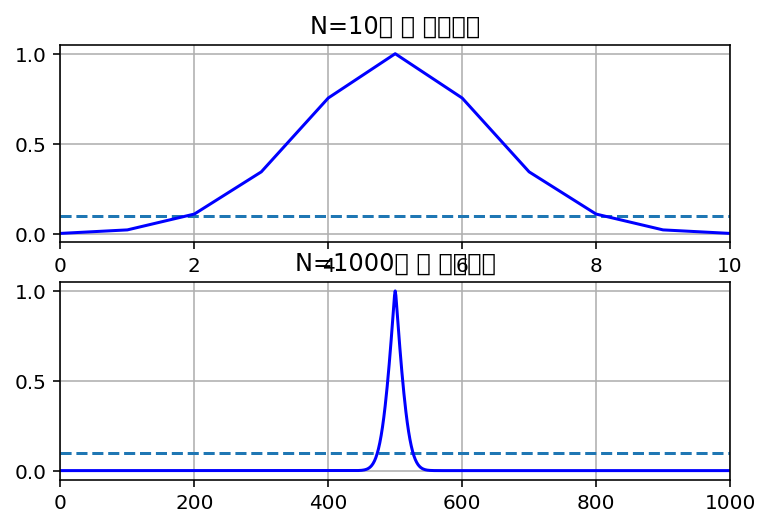

In [107]:
plt.subplot(211)
plt.plot(pvalues1, '-b')
plt.hlines(y=0.1, xmin=0, xmax=N1+1, ls='--')
plt.xlim(0, N1)
plt.title('N={}일 때 유의확률'.format(N1))
plt.grid(True)

plt.subplot(212)
plt.plot(pvalues2, '-b')
plt.hlines(y=0.1, xmin=0, xmax=N2+1, ls='--')
plt.xlim(0, N2)
plt.title('N={}일 때 유의확률'.format(N2))
plt.grid(True)
plt.show()

### 연습 문제 9.5.4

In [112]:
# N = 5
# mu_0 = np.array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25])
n = np.array([0, 0, 0, 0, 0, 5])
n

array([0, 0, 0, 0, 0, 5])

In [113]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=25.000000000000004, pvalue=0.00013933379118562602)

### 카이제곱 독립검정

In [115]:
obs = np.array([[5,15], [10, 20]])
sp.stats.chi2_contingency(obs)

# 귀무가설 : 상관관계가 없다.
# 유의확률 : 0.75... 
# 따라서 상관관계가 없다는 귀무가설은 채택된다.

(0.0992063492063492,
 0.7527841326498471,
 1,
 array([[ 6., 14.],
        [ 9., 21.]]))

In [119]:
# 연습문제 9.5.5

obs = np.array([[4,16,20], [23, 18, 19]])
result = sp.stats.chi2_contingency(obs)

print(result[1])
# 귀무가설 : 상관관계가 없다.
# 유의확률 : 0.007...
# 따라서 상관관계가 없다는 귀무가설은 기각 된다. (상관관계가 있다.)


0.00704786570249751


### 독립표본 t 검정

In [131]:
x1 = np.array([80, 75, 85, 50, 60, 75, 70, 90, 95, 85, 80])
x2 = np.array([80, 85, 70, 80, 35, 55, 80])

# print(np.mean(x1))


sp.stats.ttest_ind(x1, x2, equal_var=False)

# p-value(유의확률) : 0.3632.. 
# 귀무가설 : 뮤 값이 같냐
# 귀무가설 채택 (실력은 같다.) (실력은 같아도 이정도 점수차이는 날 수 있다.)

Ttest_indResult(statistic=0.9526584055059303, pvalue=0.36325772995270544)